In [1]:
#Importing necessary libraries
import os
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats


In [2]:
#setting maximum diplay limit
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
#Reading the file
data=pd.read_csv(r'C:\Users\PKK\Desktop\Google Play Store Apps\googleplaystore.csv')

In [4]:
#Getting Information About the Data
def data_info(data):
    
    print('\n','Shape of Data: ',data.shape,'\n',
         '\n','Number of Rows: ',data.shape[0],'\n',
          '\n','Number of Columns: ',data.shape[1],'\n',
          '\n','Column Names: ',data.columns.values,'\n','\n','Any Missing Values in Data:',data.isnull().values.any(),
      '\n','Unique Labels per Column:',data.nunique(),'\n','\n',data.info())
    
    #Getting the profile report
    return(data.profile_report())

data_info(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB

 Shape of Data:  (10841, 13) 
 
 Number of Rows:  10841 
 
 Number of Columns:  13 
 
 Column Names:  ['App' 'Category' 'Rating' 'Reviews' 'Size' 'Installs' 'Type

In [5]:
#data cleaning for the columns and converting them into required format and datatype
def data_cleaning():
    #From the analysis it is identified that there is mismatch of rows in the data
    data.iloc[10472,1:] = data.iloc[10472,1:].shift(1)
    data[10471:10473]
  
    # Data cleaning for "Size" column
    data['Size'] = data['Size'].map(lambda x: x.rstrip('M'))
    data['Size'] = data['Size'].map(lambda x: str(round((float(x.rstrip('k'))/1024), 1)) if x[-1]=='k' else x)
    data['Size'] = data['Size'].map(lambda x: np.nan if x.startswith('Varies') else x)
    data['Size']=data['Size'].astype('float')

    
    # Data cleaning for "Installs" column
    data['Installs'] = data['Installs'].map(lambda x: x.rstrip('+'))
    data['Installs'] = data['Installs'].map(lambda x: ''.join(x.split(',')))
    data['Installs']=data['Installs'].astype('int')
    
    #Data Cleaning for the price column
    data['Price']=data['Price'].map(lambda x: x.lstrip('$'))
    data['Price']=data['Price'].astype('float')
    
    
    #Converting datatypes
    data['Reviews']=data['Reviews'].astype('int')
    data['Rating']=data['Rating'].astype('float')
    
    #dropping the unnecessary columns
    data.drop(columns=['Last Updated', 'Current Ver','Android Ver'],inplace=True)
    
    #Renaming columns as per the requirement
    data.rename(columns={'Size':'Size(mb)','Price':'Price($)'},inplace=True)
    
    return(data.head())
    
data_cleaning()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews  Size(mb)  Installs  Type  Price($) Content Rating  \
0      159      19.0     10000  Free       0.0       Everyone   
1      967      14.0    500000  Free       0.0       Everyone   
2    87510       8.7   5000000  Free       0.0       Everyone   
3   215644      25.0  50000000  Free       0.0           Teen   
4      967       2.8    100000  Free       0.0       Everyone   

                      Genres  
0               Art & Design  
1  Art & Design;Pretend Play  
2               Art & Design  
3               Art & Design  
4    Art & Design;Creativity

any missing data in dataset: True 
 
 columnwise missing data :
          total_missing_count  percentage_missing datatype
Category                    1            0.009224   object
Rating                   1474           13.596532  float64
Size(mb)                 1695           15.635089  float64
Type                        1            0.009224   object
Genres                      1            0.009224   object

 
 Total percentage of missing data : 2.9259293423115946  % 


 total percentage of rows affected by missing data : 28.70583894474679 % 



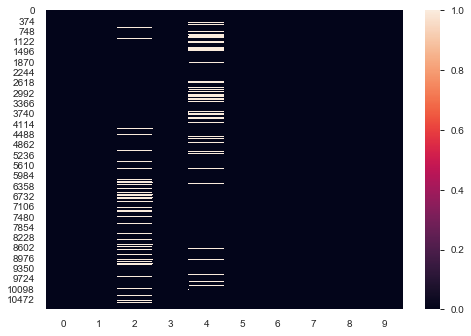

In [6]:
#Missing Data Analysis
def missing_data_analysis(data):
    print('any missing data in dataset:',data.isnull().values.any(),'\n','\n','columnwise missing data :')
    
    missing_data=pd.DataFrame({'total_missing_count':data.isnull().sum(),
                           'percentage_missing':data.isnull().sum()/data.shape[0]*100,
                           'datatype':data.dtypes
                          })

    
    print(missing_data[missing_data.total_missing_count>0])
    sns.heatmap(data.isnull().values)



    #Counting cells with missing values:(Total number of NA)
    a=sum(data.isnull().values.ravel())
    #Getting total number of cells
    b=np.prod(data.shape)
    #Getting percentage of NA in overall data
    print('\n','\n','Total percentage of missing data :',(a/b)*100,' % \n')


    #Calculating Rows affected by NA- Rows having na/ Total number of rows

    #Counting rows that have missing values somewhere:
    a=sum([True for idx,row in data.iterrows() if any(row.isnull())])
    #Total Number of rows in data
    b=data.shape[0]
    print('\n','total percentage of rows affected by missing data :',(a/b)*100,'% \n')

    
#calling the function
missing_data_analysis(data)

missing data imputed sucessfully


App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

    Reviews  Size(mb)    Installs  Type  Price($) Content Rating  \
0     159.0      19.0     10000.0  Free       0.0       Everyone   
1     967.0      14.0    500000.0  Free       0.0       Everyone   
2   87510.0       8.7   5000000.0  Free       0.0       Everyone   
3  215644.0      25.0  50000000.0  Free       0.0           Teen   
4     967.0       2.8    100000.0  Free       0.0       Everyone   

                      Genres  
0               Art & Design  
1  Art & Design;Pretend Play  
2               Art & Design  
3               Art & Design  
4    Art & Design;Creativity

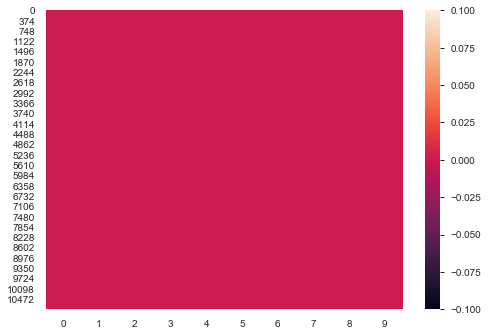

In [11]:
def missing_data_imputation(data):
    #Imputing missing values
    from sklearn.impute import SimpleImputer
    from sklearn.impute import KNNImputer
    #Imputation for categorical values
    imp=SimpleImputer(strategy='most_frequent')
    for col in data[['Category','Type','Genres']]:
        data[col]=imp.fit_transform(data[[col]])
    
     
    #Imputing int values using KNN Imputation
    knn_imp=KNNImputer(n_neighbors=3,weights='uniform',)
    #KNN imputation
    for col in data[['Rating','Reviews','Size(mb)','Installs','Price($)']]:
        data[col]=knn_imp.fit_transform(data[[col]])
    
    print('missing data imputed sucessfully')
    sns.heatmap(data.isnull().values)
    return(data.head())

    
missing_data_imputation(data)  

In [12]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size(mb)', 'Installs', 'Type',
       'Price($)', 'Content Rating', 'Genres'],
      dtype='object')

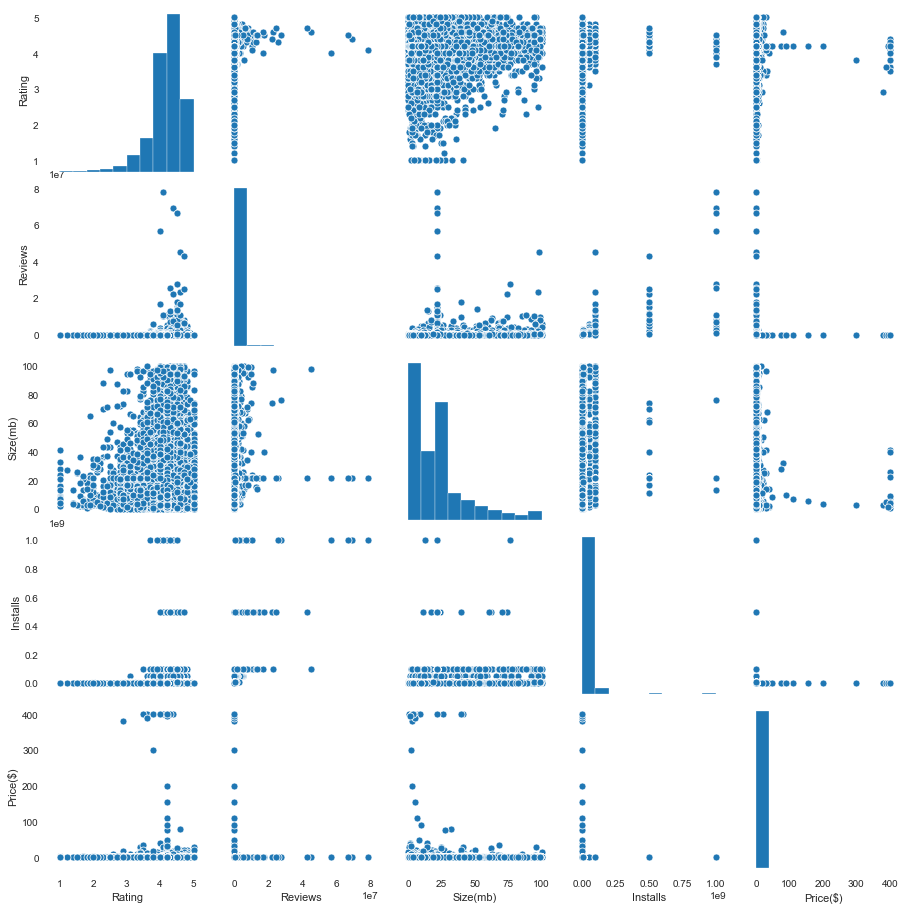

In [13]:
#Graphical Data Analysis

sns.pairplot(data)

In [16]:

numerical_data=data[['Rating','Reviews','Size(mb)','Installs','Price($)']]
categorical_columns=data[['App','Category','Type','Content Rating','Genres']]

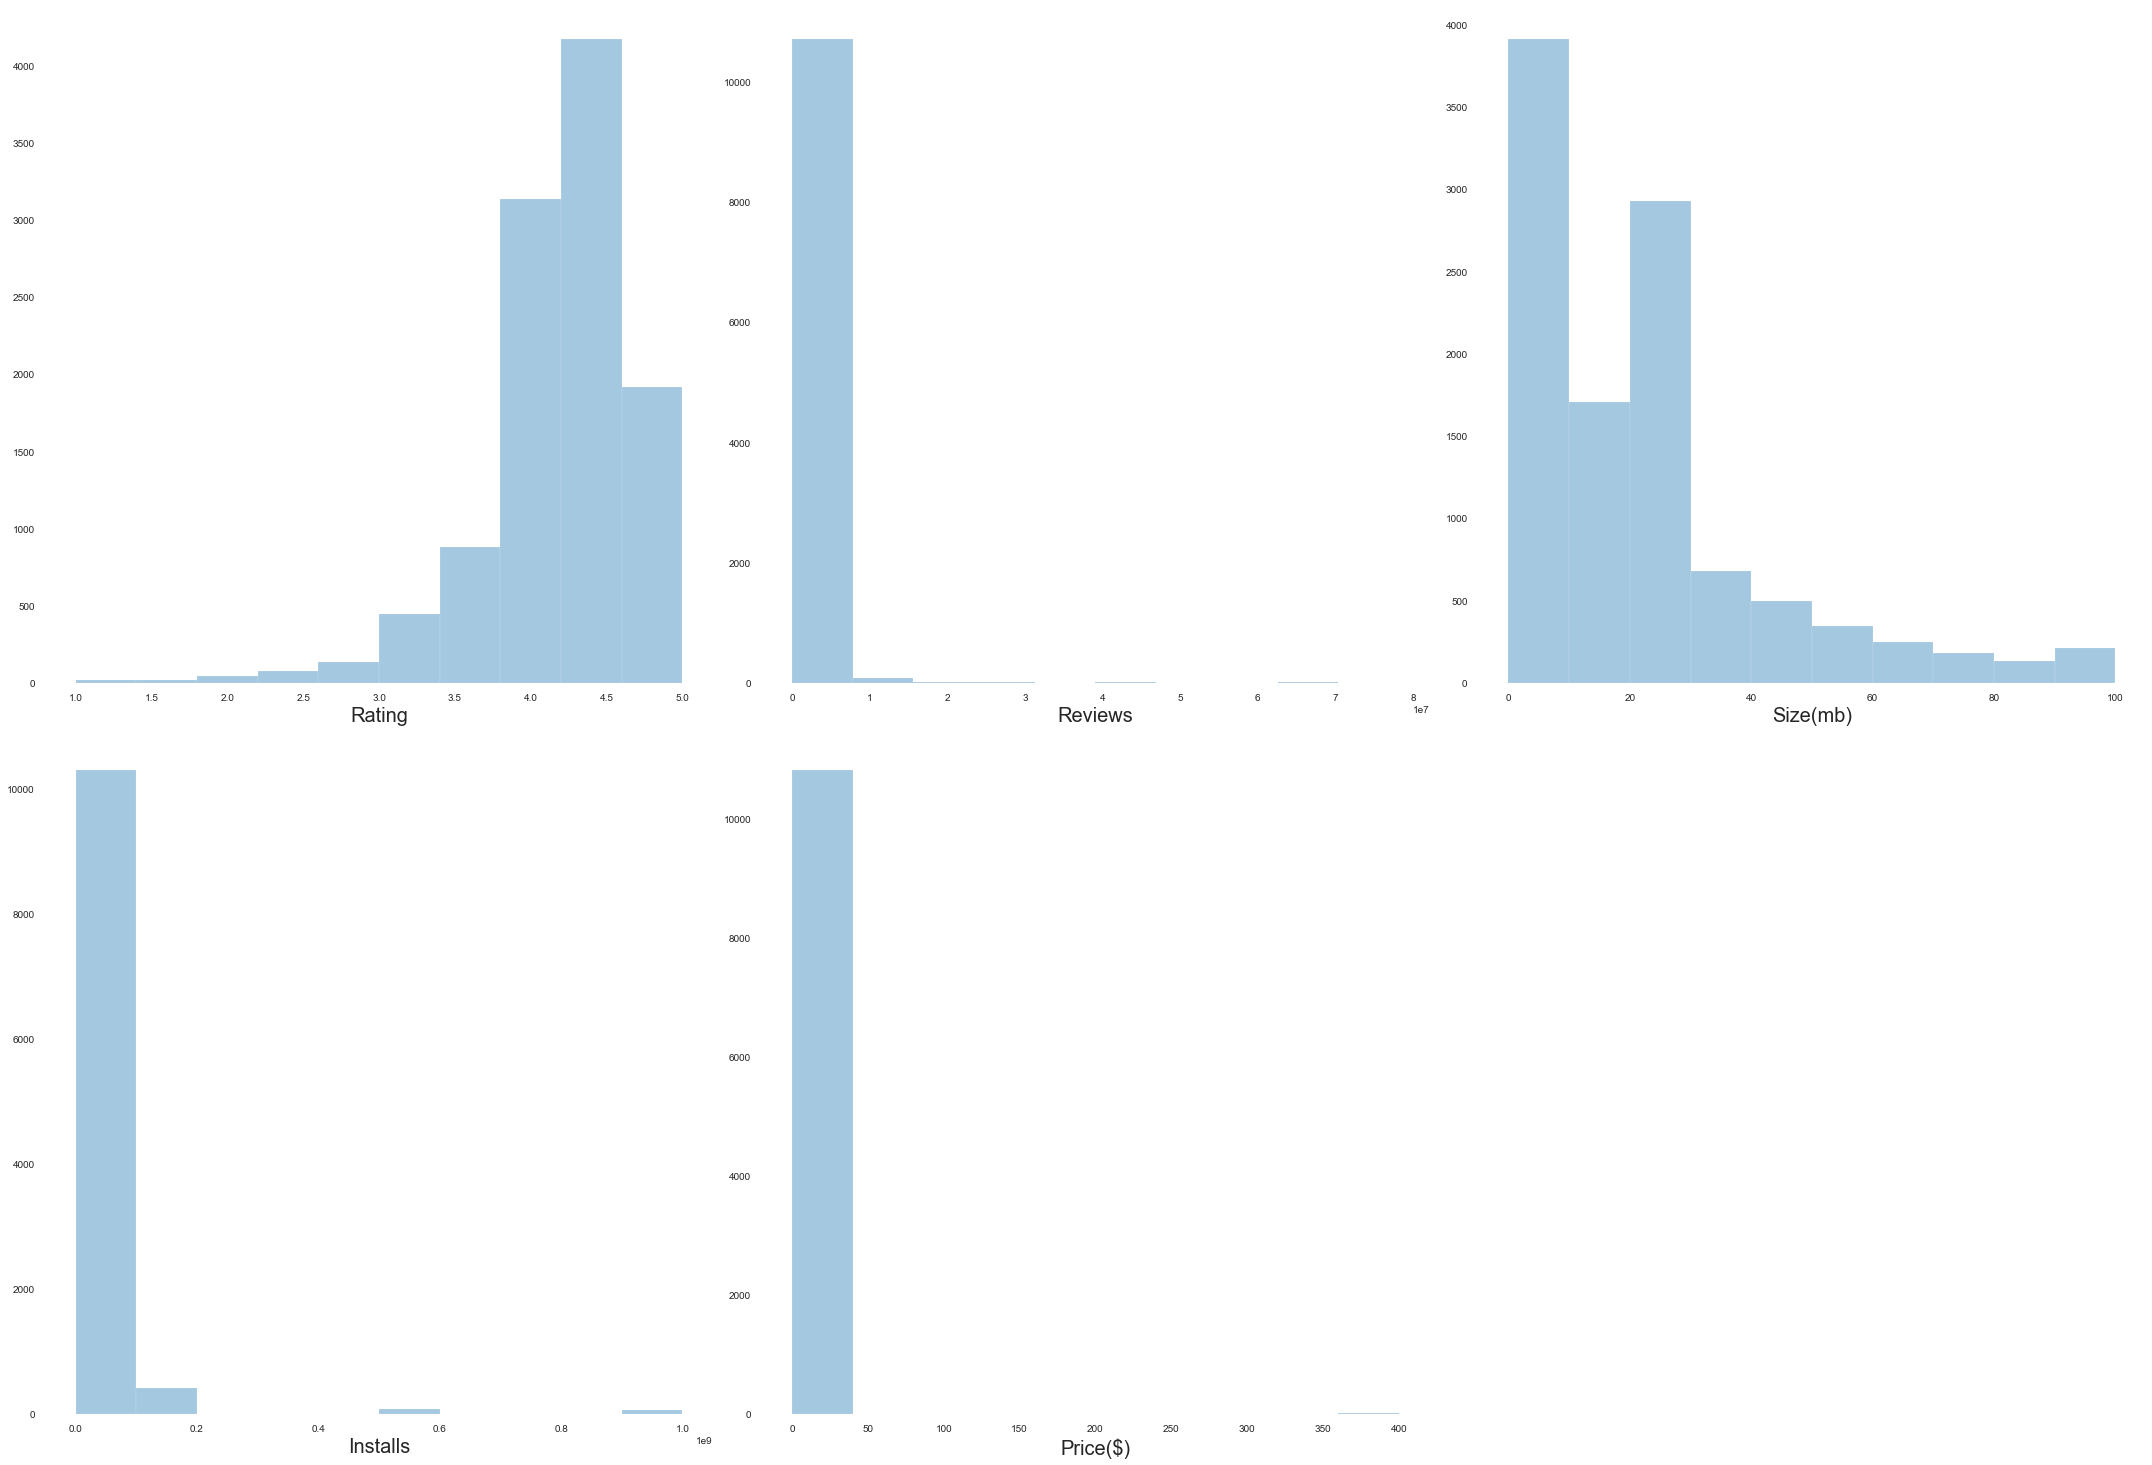

In [25]:
#Univariate Analysis 
#Univariate analysis for the numerical column

#Checking the distribution of numerical columns with the help of histogram
plt.figure(figsize=(30,30), facecolor='white')
plotnumber = 1

for column in numerical_data:
    if plotnumber<=30 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(numerical_data[column],bins=10,kde=False)
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

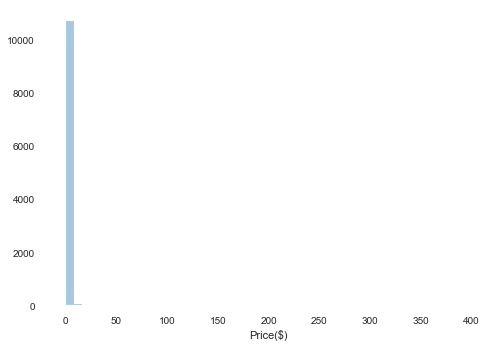

In [32]:
sns.distplot(data['Price($)'],kde=False)

Name of Feature : Rating
Skewness of Feature : -1.9922381511005718


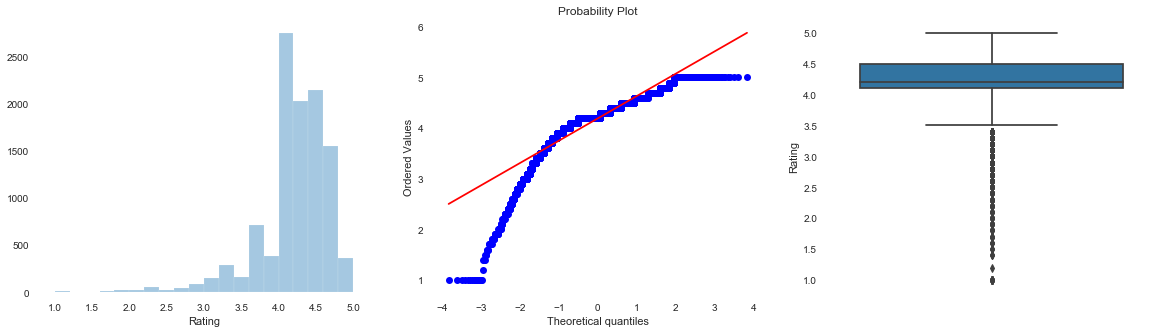

Name of Feature : Reviews
Skewness of Feature : 16.450332135250825


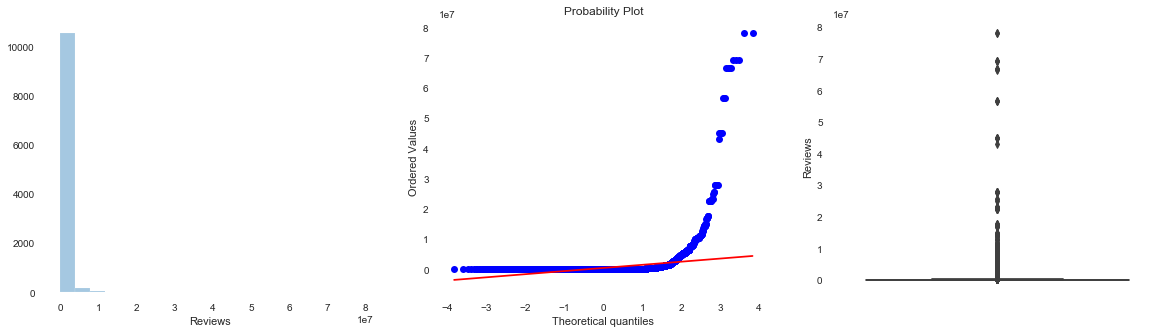

Name of Feature : Size(mb)
Skewness of Feature : 1.695573609279106


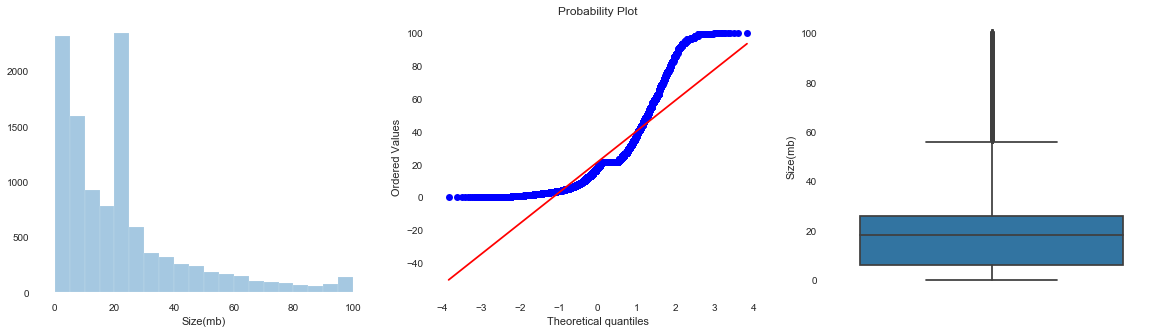

Name of Feature : Installs
Skewness of Feature : 9.572514112187099


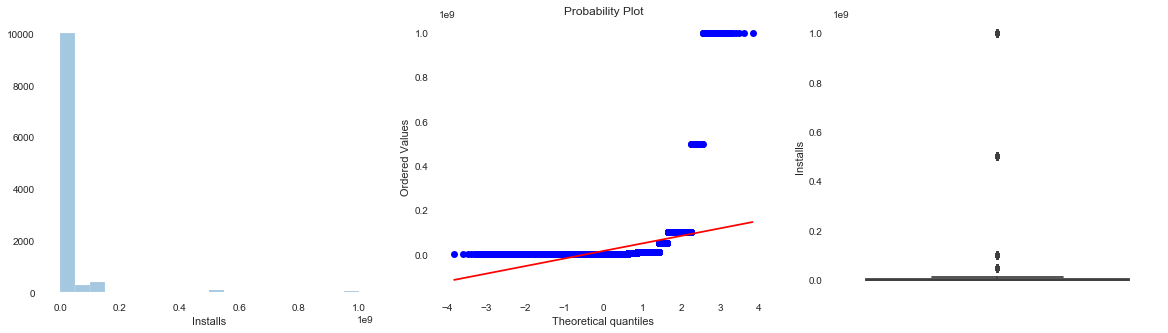

Name of Feature : Price($)
Skewness of Feature : 23.708489758783823


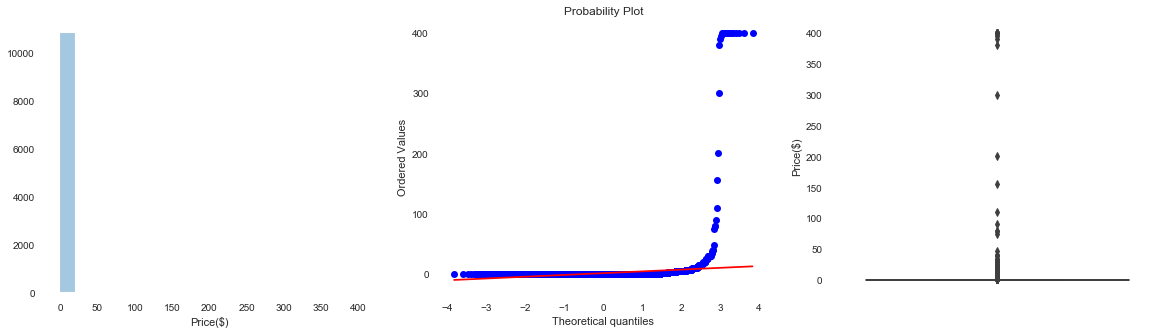

In [33]:
for col in numerical_data:
    print('Name of Feature :',col)
    
    print('Skewness of Feature :',numerical_data[col].skew())
    
    plt.figure(figsize=(20,5))
    
    plt.subplot(1,3,1)
    sns.distplot(numerical_data[col],bins=20,kde=False)
    
    plt.subplot(1,3,2)
    stats.probplot(numerical_data[col],dist='norm',plot=plt)
    
    plt.subplot(1,3,3)
    sns.boxplot(y=numerical_data[col])
    plt.show()

In [34]:
numerical_data.columns

Index(['Rating', 'Reviews', 'Size(mb)', 'Installs', 'Price($)'], dtype='object')

In [36]:
numerical_data.profile_report()

C:\Users\PKK\Anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


C:\Users\PKK\Anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


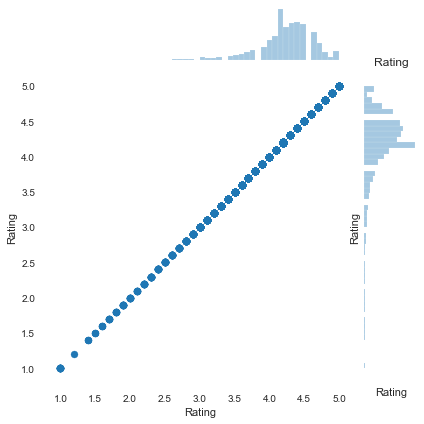

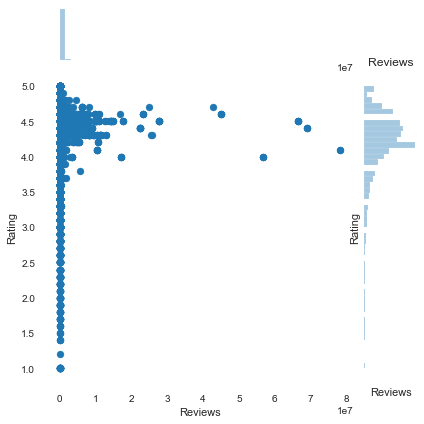

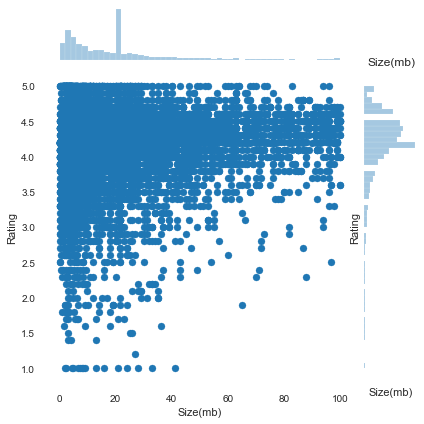

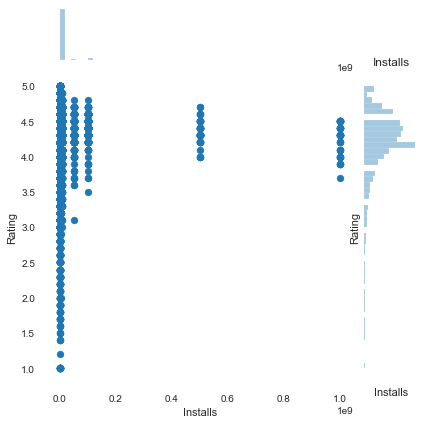

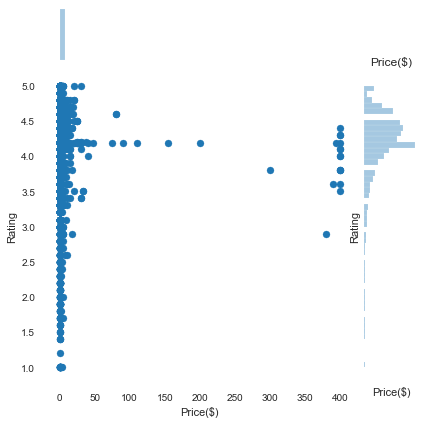

In [44]:
#Bivariate Analysis for Numerical Columns
#Bivariate analysis
for feature in numerical_data:
    ax=sns.jointplot(x=feature,y='Rating',data=numerical_data,kind='scatter')
    plt.xlabel(feature)
    plt.ylabel('Rating')
    plt.title(feature)

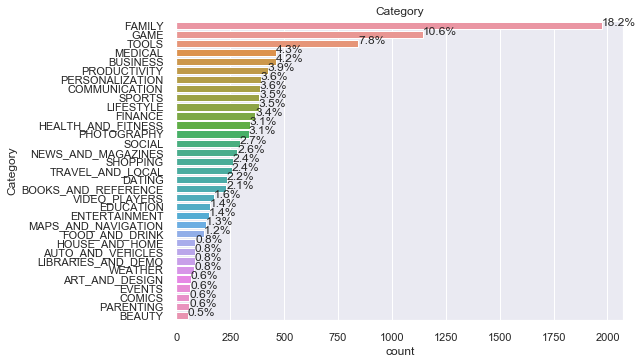

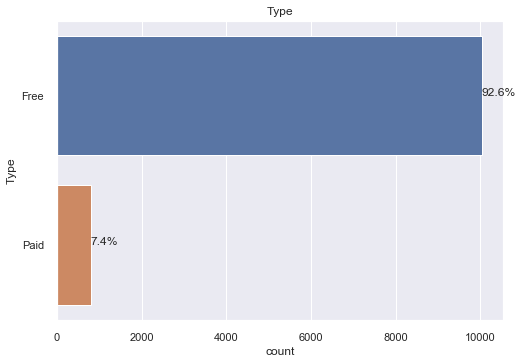

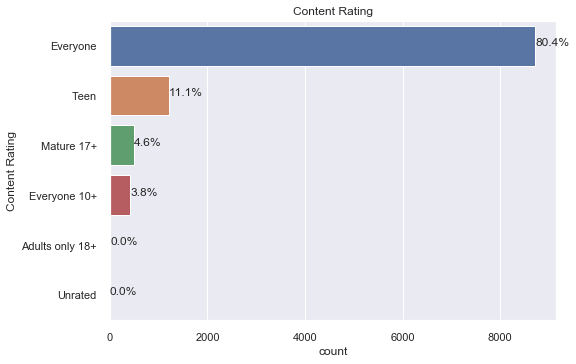

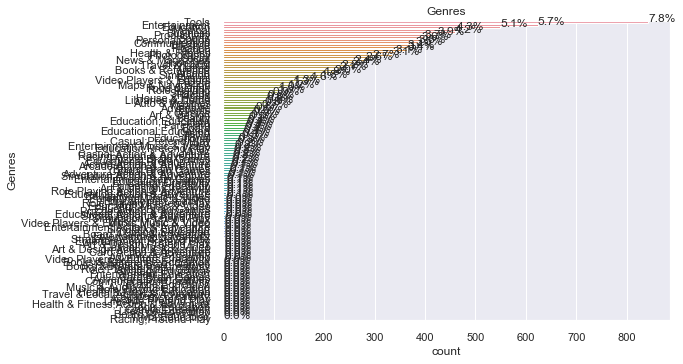

In [50]:
names=data[['Category', 'Type', 'Content Rating', 'Genres']]
for feature in names:
    ax=sns.countplot(y=names[feature],data=names,order = names[feature].value_counts().index)
    plt.xlabel('count')
    plt.ylabel(feature)
    plt.title(feature)
   
    total = len(names[feature])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
        
    plt.show()

In [39]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size(mb)', 'Installs', 'Type',
       'Price($)', 'Content Rating', 'Genres'],
      dtype='object')

Bar plot between Category and Price


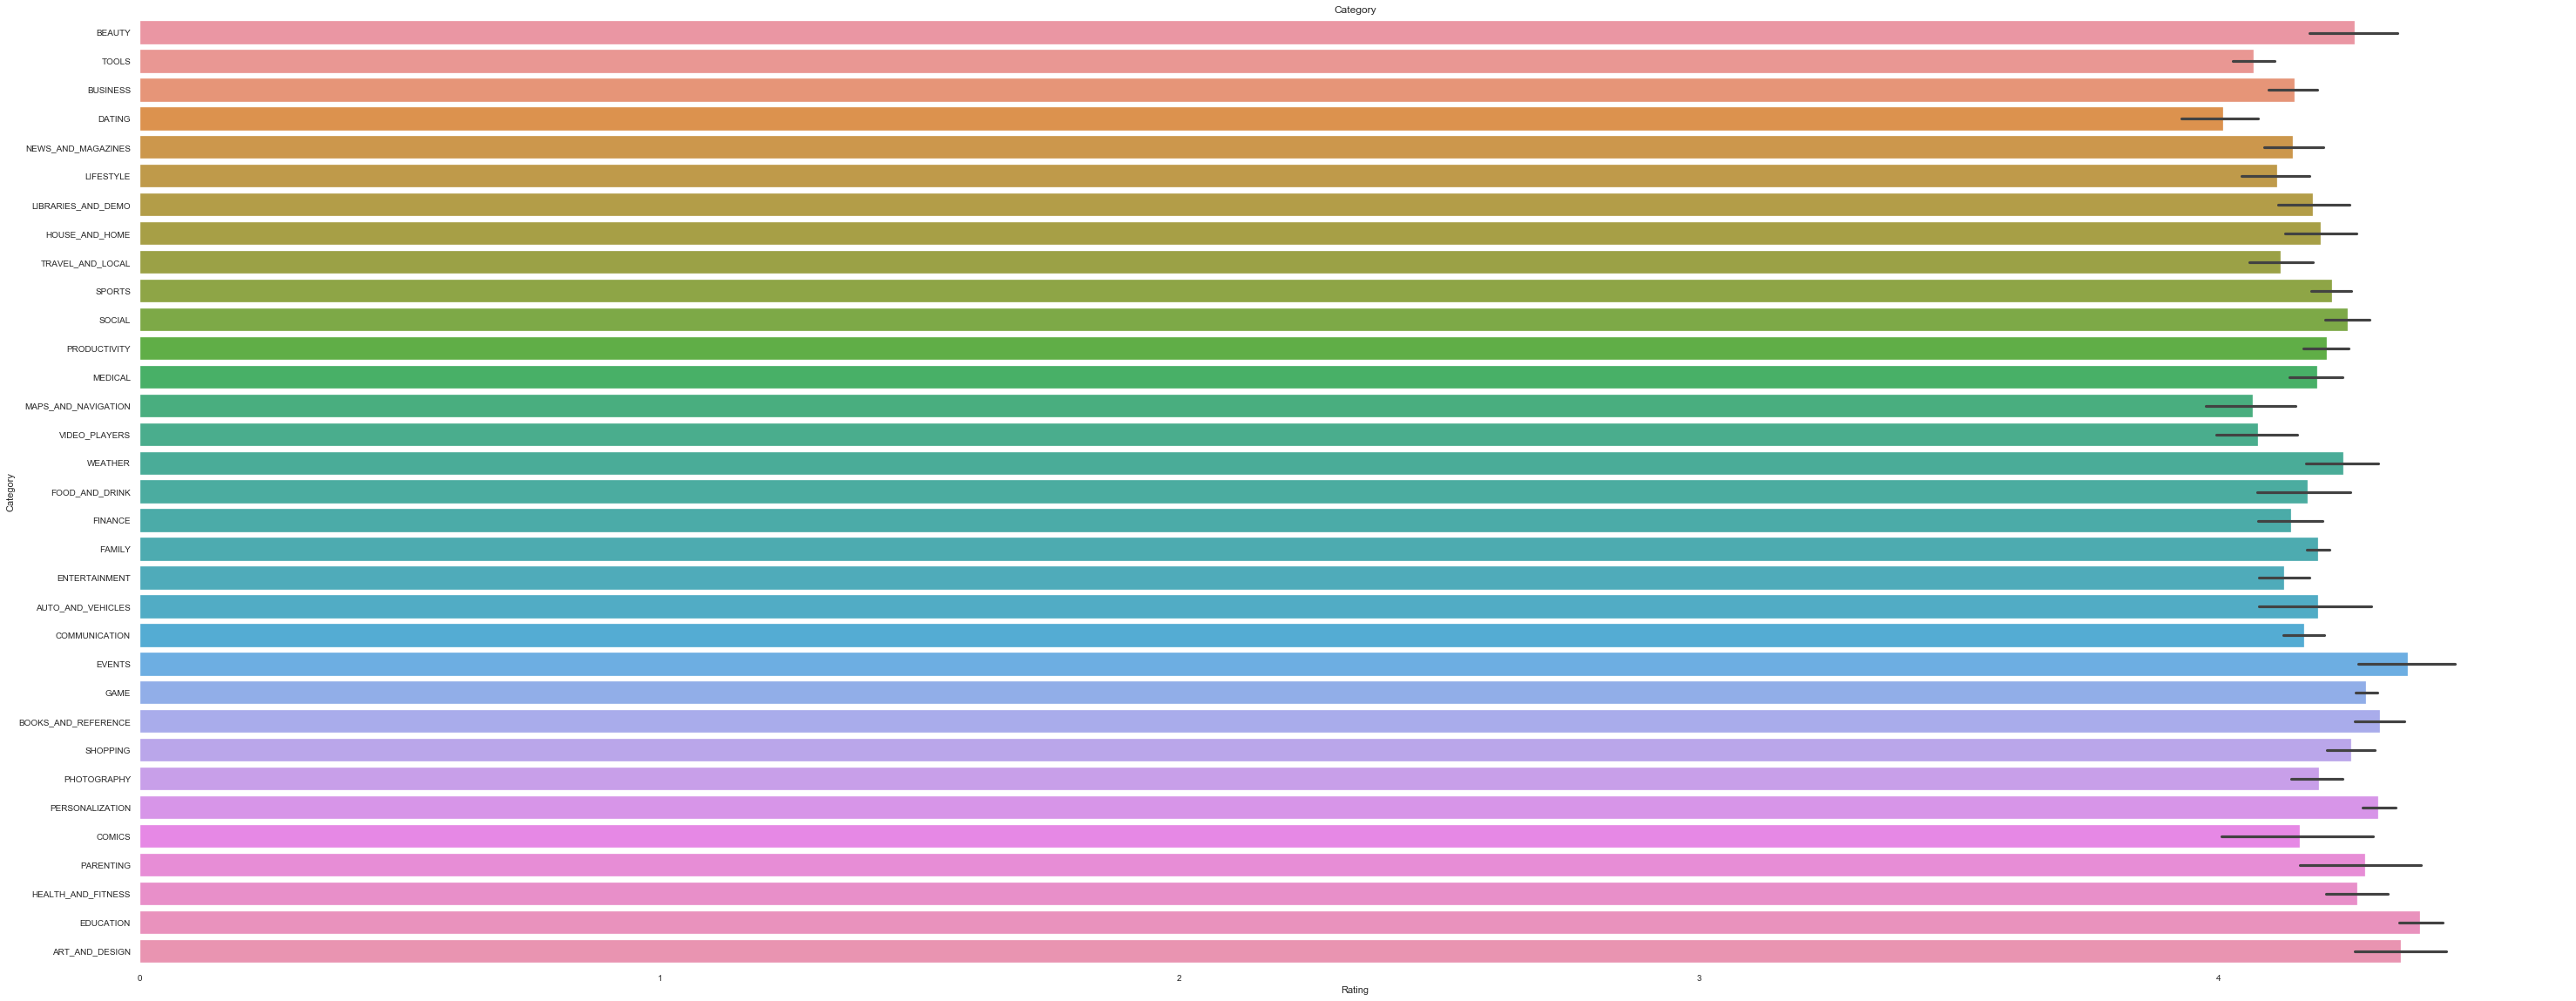

Bar plot between Type and Price


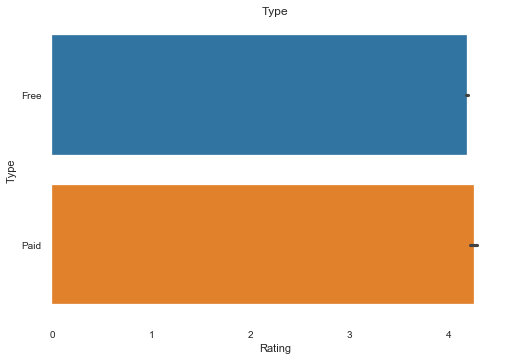

Bar plot between Content Rating and Price


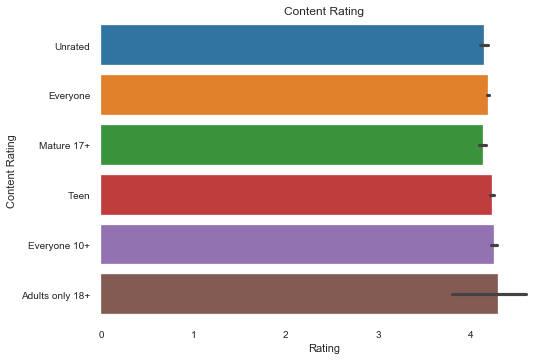

Bar plot between Genres and Price


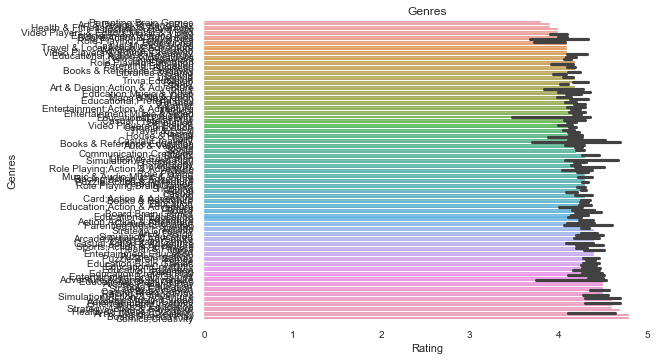

In [42]:
#Bivariate analysis
names=data[['Category', 'Type', 'Content Rating', 'Genres']]
plt.figure(figsize=(50,20))

for feature in names:
    print('Bar plot between %s and Price'%feature)
    result = data.groupby([feature])['Rating'].aggregate(np.median).reset_index().sort_values('Rating')
    ax=sns.barplot(x=numerical_data['Rating'],y=names[feature],data=names,order=result[feature])
    plt.ylabel(feature)
    plt.xlabel('Rating')
    plt.title(feature)  
    plt.show()

Bar plot between Category and Price


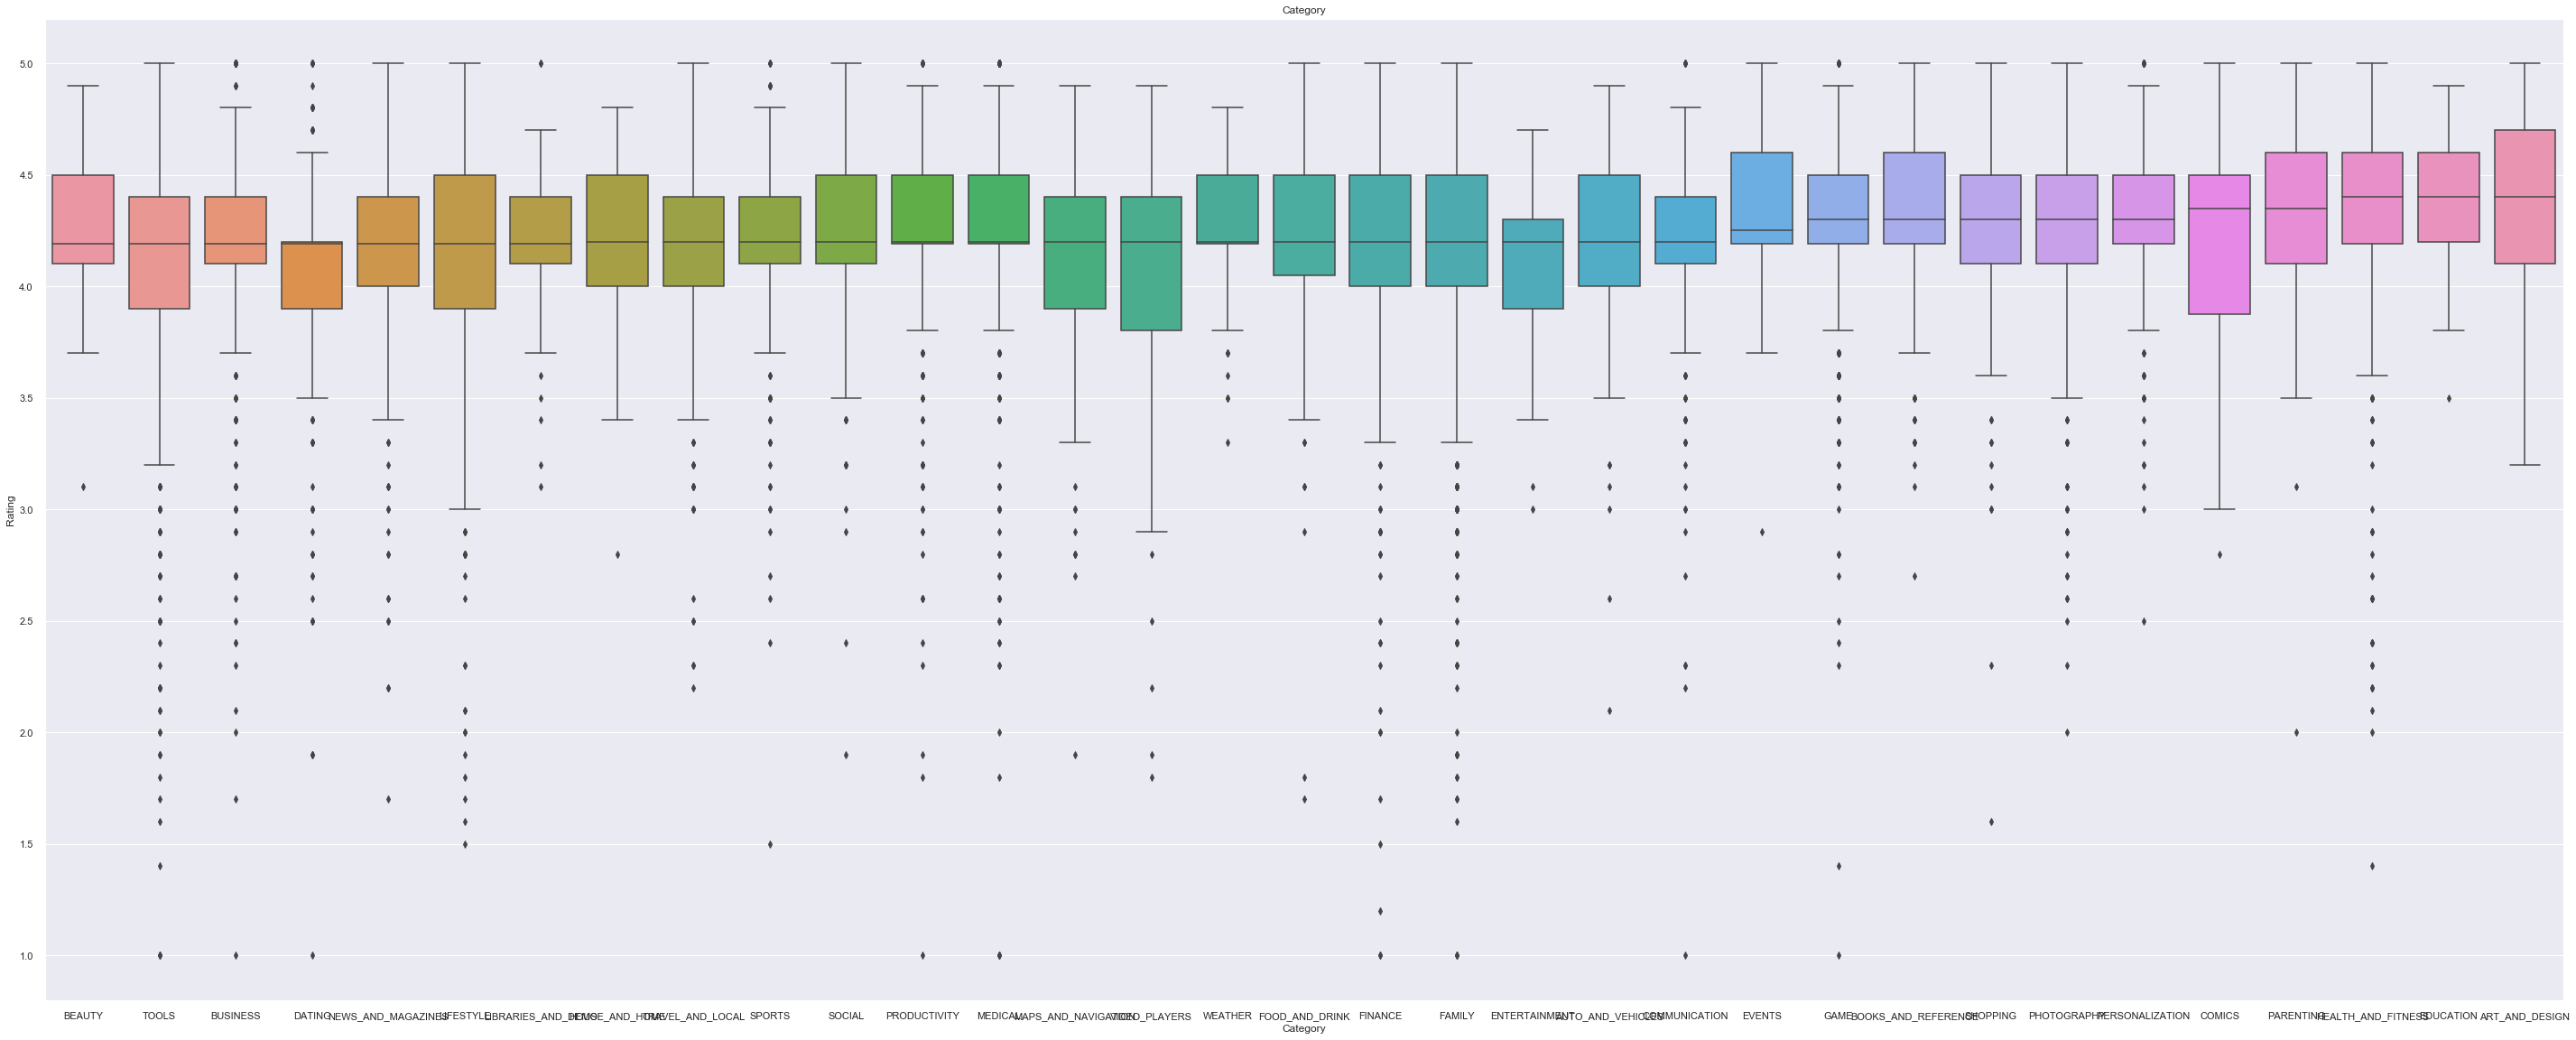

Bar plot between Type and Price


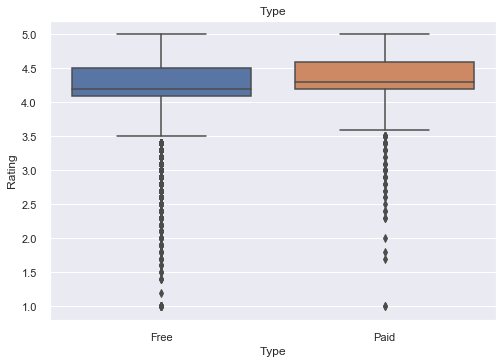

Bar plot between Content Rating and Price


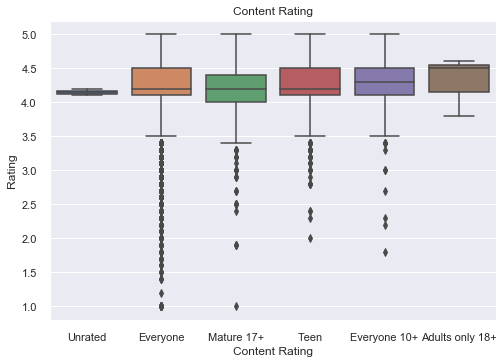

Bar plot between Genres and Price


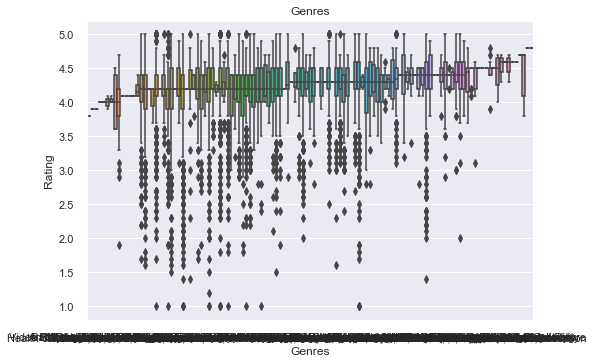

In [46]:
#Bivariate analysis
names=data[['Category', 'Type', 'Content Rating', 'Genres']]
plt.figure(figsize=(50,20))
sns.set(context='notebook', style='darkgrid', 
            palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)
for feature in names:
    print('Box plot between %s and Rating'%feature)
    result = data.groupby([feature])['Rating'].aggregate(np.median).reset_index().sort_values('Rating')
    ax=sns.boxplot(y=numerical_data['Rating'],x=names[feature],data=names,order=result[feature])
    
    plt.ylabel('Rating')
    plt.xlabel(feature)
    plt.title(feature)  
    plt.show()

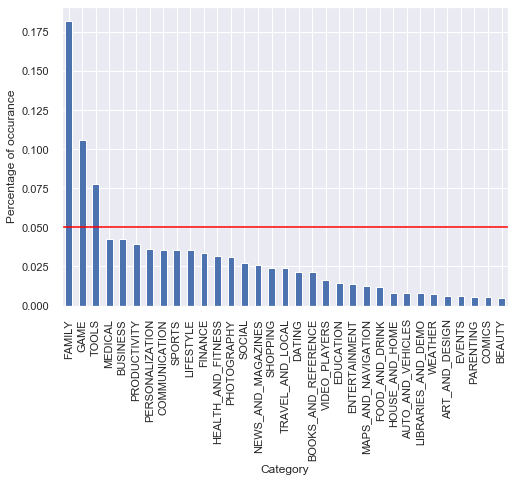

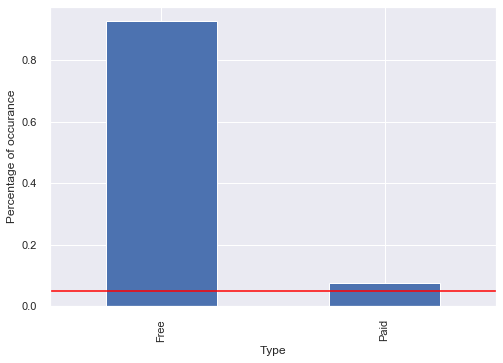

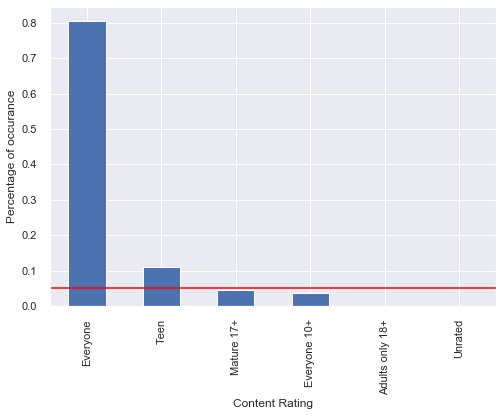

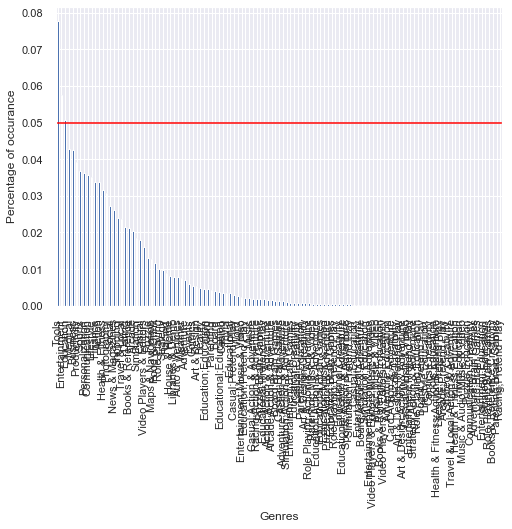

In [49]:
#Identifying Rare Categories in Categorical Distribution
names=data[['Category', 'Type', 'Content Rating', 'Genres']]

total = len(names)

# for each categorical variable
for col in names:

    # count the number of houses per category
    # and divide by total houses

    # aka percentage of houses per category

    temp_df = pd.Series(data[col].value_counts() / total)

    # make plot with the above percentages
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)

    # add a line at 5 % to flag the threshold for rare categories
    fig.axhline(y=0.05, color='red')
    fig.set_ylabel('Percentage of occurance')
    plt.show()

In [51]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size(mb)', 'Installs', 'Type',
       'Price($)', 'Content Rating', 'Genres'],
      dtype='object')

In [55]:
#Most popular category
data[['Category','Installs']].sort_values(by='Installs',ascending=False)

Category      Installs
3896                  GAME  1.000000e+09
3943                SOCIAL  1.000000e+09
335          COMMUNICATION  1.000000e+09
3523          PRODUCTIVITY  1.000000e+09
3565          PRODUCTIVITY  1.000000e+09
2884           PHOTOGRAPHY  1.000000e+09
3665         VIDEO_PLAYERS  1.000000e+09
2853           PHOTOGRAPHY  1.000000e+09
4234         COMMUNICATION  1.000000e+09
3687         VIDEO_PLAYERS  1.000000e+09
2808           PHOTOGRAPHY  1.000000e+09
4170          PRODUCTIVITY  1.000000e+09
4153         COMMUNICATION  1.000000e+09
4150                 TOOLS  1.000000e+09
152    BOOKS_AND_REFERENCE  1.000000e+09
4144                SOCIAL  1.000000e+09
4104         COMMUNICATION  1.000000e+09
4098      TRAVEL_AND_LOCAL  1.000000e+09
4096         COMMUNICATION  1.000000e+09
3736    NEWS_AND_MAGAZINES  1.000000e+09
3765    NEWS_AND_MAGAZINES  1.000000e+09
9844    NEWS_AND_MAGAZINES  1.000000e+09
3816    NEWS_AND_MAGAZINES  1.000000e+09
336          COMMUNICATION  1.000000e+09
340          COMMUNICATION  1.000000e+09
341          COMMUNICATION  1.000000e+09
464          COMMUNICATION  1.000000e+09
5856                FAMILY  1.000000e+09
1872                  GAME  1.000000e+09
5395           PHOTOGRAPHY  1.000000e+09
1750                  GAME  1.000000e+09
865          ENTERTAINMENT  1.000000e+09
3234                 TOOLS  1.000000e+09
3232      TRAVEL_AND_LOCAL  1.000000e+09
3223      TRAVEL_AND_LOCAL  1.000000e+09
468          COMMUNICATION  1.000000e+09
1700                  GAME  1.000000e+09
3117      TRAVEL_AND_LOCAL  1.000000e+09
451          COMMUNICATION  1.000000e+09
411          COMMUNICATION  1.000000e+09
3127      TRAVEL_AND_LOCAL  1.000000e+09
1654                  GAME  1.000000e+09
391          COMMUNICATION  1.000000e+09
386          COMMUNICATION  1.000000e+09
382          COMMUNICATION  1.000000e+09
381          COMMUNICATION  1.000000e+09
3454          PRODUCTIVITY  1.000000e+09
3996         COMMUNICATION  1.000000e+09
338          COMMUNICATION  1.000000e+09
1917                  GAME  1.000000e+09
2611                SOCIAL  1.000000e+09
3904         COMMUNICATION  1.000000e+09
3928         VIDEO_PLAYERS  1.000000e+09
2554                SOCIAL  1.000000e+09
2544                SOCIAL  1.000000e+09
2604                SOCIAL  1.000000e+09
2545                SOCIAL  1.000000e+09
3909                SOCIAL  1.000000e+09
3739    NEWS_AND_MAGAZINES  5.000000e+08
403          COMMUNICATION  5.000000e+08
4122         COMMUNICATION  5.000000e+08
4115    NEWS_AND_MAGAZINES  5.000000e+08
7536                 TOOLS  5.000000e+08
5596    HEALTH_AND_FITNESS  5.000000e+08
3796    NEWS_AND_MAGAZINES  5.000000e+08
4105                SOCIAL  5.000000e+08
4676         COMMUNICATION  5.000000e+08
3907                 TOOLS  5.000000e+08
3767    NEWS_AND_MAGAZINES  5.000000e+08
3934          PRODUCTIVITY  5.000000e+08
1662                  GAME  5.000000e+08
1661                  GAME  5.000000e+08
2610                SOCIAL  5.000000e+08
3755    NEWS_AND_MAGAZINES  5.000000e+08
3522          PRODUCTIVITY  5.000000e+08
1655                  GAME  5.000000e+08
1842                  GAME  5.000000e+08
420          COMMUNICATION  5.000000e+08
431          COMMUNICATION  5.000000e+08
2603                SOCIAL  5.000000e+08
465          COMMUNICATION  5.000000e+08
3574          PRODUCTIVITY  5.000000e+08
3569          PRODUCTIVITY  5.000000e+08
3235                 TOOLS  5.000000e+08
474          COMMUNICATION  5.000000e+08
1729                  GAME  5.000000e+08
4365         VIDEO_PLAYERS  5.000000e+08
3562          PRODUCTIVITY  5.000000e+08
3255                 TOOLS  5.000000e+08
467          COMMUNICATION  5.000000e+08
2546                SOCIAL  5.000000e+08
1705                  GAME  5.000000e+08
4147                 TOOLS  5.000000e+08
1702                  GAME  5.000000e+08
3533          PRODUCTIVITY  5.000000e+08
3265                 TOOLS  5.000000e+08
4566                 TOOLS  5.000000e+08


In [60]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size(mb)', 'Installs', 'Type',
       'Price($)', 'Content Rating', 'Genres'],
      dtype='object')

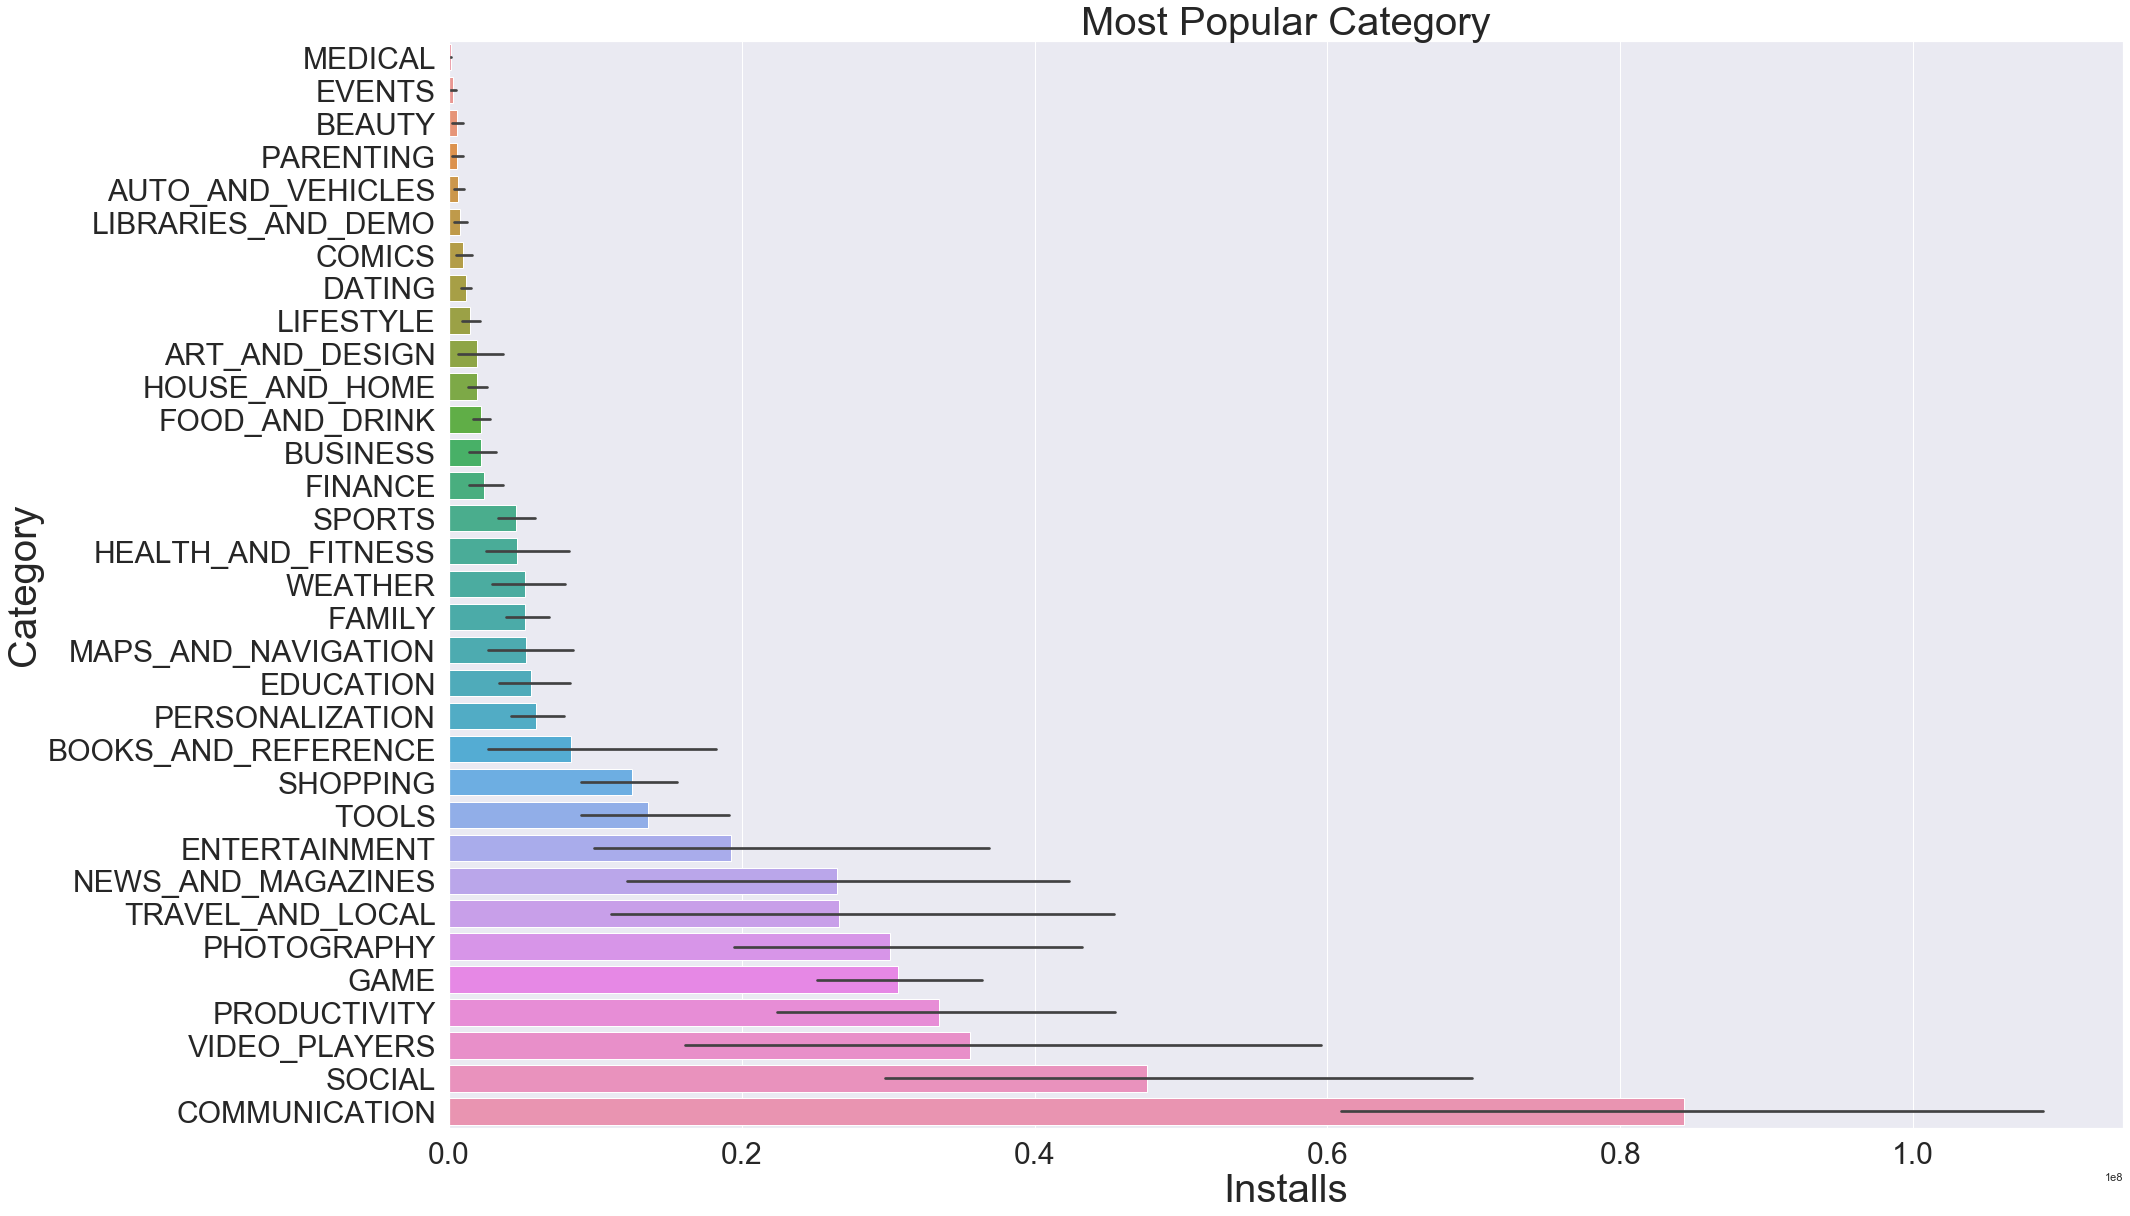

In [62]:
plt.figure(figsize=(30,20))
result = data.groupby(['Category'])['Installs'].aggregate(np.mean).reset_index().sort_values('Installs')
b=sns.barplot(y=data['Category'],x=data['Installs'],data=data,
              order=result['Category'])
b.axes.set_title("Most Popular Category",fontsize=40)
b.set_xlabel("Installs",fontsize=40)
b.set_ylabel("Category",fontsize=40)
b.tick_params(labelsize=30)
plt.show()

In [90]:
data.groupby('Size(mb)').describe(include='object')['App']

#App with the largest size
data[['App','Size(mb)']].sort_values(by='Size(mb)',ascending=False).head(14)

count unique                                                top  \
Size(mb)                                                                     
0.000000      28     28                                    Plugin:AOT v5.0   
0.100000      35     34                      Hangouts Dialer - Call Phones   
0.200000      49     49                                          BI Office   
0.300000      32     32                             BS Match Maker Premium   
0.400000      29     29                                    Fo File Manager   
0.500000      28     28                                   Pocket GMAT Math   
0.600000      25     25                                        BS Battery+   
0.700000      22     21                                 iBP Blood Pressure   
0.800000      26     26                       Galactic Core Free Wallpaper   
0.900000      33     33                       DREAM-e: Dream Analysis A.I.   
1.000000      16     16                          German Vocabulary Trainer   
1.100000      32     32   Vpn Hosts (ad blocker & no root & support ipv6 )   
1.200000      41     41                                    Wifi BT Scanner   
1.300000      35     35                                           Color CL   
1.400000      37     36                                 FarmersOnly Dating   
1.500000      48     47                                All Social Networks   
1.600000      39     39                               HTC Sense Input - FA   
1.700000      40     40                       WiFi Baby Monitor - NannyCam   
1.800000      50     47                       CM Flashlight (Compass, SOS)   
1.900000      32     32                                  ai robot keyboard   
2.000000      51     49                                        Open Camera   
2.100000      40     40                                      Wallpapers HD   
2.200000      45     45                      Resume PDF Maker / CV Builder   
2.300000      68     68                cm, mm to inch, feet converter tool   
2.400000      48     47                                           EMT PASS   
2.500000      68     68                     Download Facebook Photo Albums   
2.600000      50     49                       Blood Pressure Log - MyDiary   
2.700000      53     51                        JackThreads: Men's Shopping   
2.800000      65     65                     Turbo AI™ - Personal assistant   
2.900000      69     67                          JH Blood Pressure Monitor   
3.000000      62     62           Diabetes mellitus (DM) from zero to hero   
3.100000      56     56                                    BR Video Player   
3.200000      55     55   📏 Smart Ruler ↔️ cm/inch measuring for homework!   
3.300000      77     73        UC Browser Mini -Tiny Fast Private & Secure   
3.400000      65     64             Cardi B Live Stream Video Chat - Prank   
3.500000      51     51  2 Amateur ham radio CW Morse code practice key...   
3.600000      57     57                                      Calculator Fn   
3.700000      63     63                                    AZ Mobile Gizmo   
3.800000      62     60                         2017 EMRA Antibiotic Guide   
3.900000      62     58                                        Word Search   
4.000000      61     56                 Firefox Focus: The privacy browser   
4.100000      52     50                  QR Scanner & Barcode Scanner 2018   
4.200000      59     56  QuickPic - Photo Gallery with Google Drive Sup...   
4.300000      54     53                            Web Browser for Android   
4.400000      42     41                                    Diary with lock   
4.500000      40     39                                          Brit + Co   
4.600000      46     44                                          Chictopia   
4.700000      36     33                       DU Browser—Browse fast & fun   
4.800000      34     32                           Blood Pressure Companion   
4.900000      50     47          

In [92]:
data.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

    Reviews  Size(mb)    Installs  Type  Price($) Content Rating  \
0     159.0      19.0     10000.0  Free       0.0       Everyone   
1     967.0      14.0    500000.0  Free       0.0       Everyone   
2   87510.0       8.7   5000000.0  Free       0.0       Everyone   
3  215644.0      25.0  50000000.0  Free       0.0           Teen   
4     967.0       2.8    100000.0  Free       0.0       Everyone   

                      Genres  
0               Art & Design  
1  Art & Design;Pretend Play  
2               Art & Design  
3               Art & Design  
4    Art & Design;Creativity